# One-Way ANOVA: Regional Differences in Synthetic Opioid Overdose Mortality

## Import Libraries

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm

#import statsmodels.stats.multicomp as multi
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

%matplotlib inline


## Import & Prepare Data

### HHS Region 1: Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, Vermont 

In [2]:
# import desired columns and set data types
region1 = pd.read_csv('Region1.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region1.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region1['pct_tot_deaths'] = region1['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region1['HHS_region'] = '1'
#print(region1)

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region1_wave1 = region1[region1.year < 2010]
region1_wave2 = region1[(region1.year > 2009) & (region1.year < 2013)]
region1_wave3 = region1[region1.year > 2012]

#print(region1_wave3)



### HHS Region 2: New Jersey, New York

In [3]:
# import desired columns and set data types
region2 = pd.read_csv('Region2.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region2.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region2['pct_tot_deaths'] = region2['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region2['HHS_region'] = '2'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region2_wave1 = region2[region2.year < 2010]
region2_wave2 = region2[(region2.year > 2009) & (region2.year < 2013)]
region2_wave3 = region2[region2.year > 2012]

#print(region2_wave3)



### HHS Region 3: Delaware, District of Columbia, Maryland, Pennsylvania, Virginia, West Virginia 


In [4]:
# import desired columns and set data types
region3 = pd.read_csv('Region3.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region3.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region3['pct_tot_deaths'] = region3['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region3['HHS_region'] = '3'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region3_wave1 = region3[region3.year < 2010]
region3_wave2 = region3[(region3.year > 2009) & (region3.year < 2013)]
region3_wave3 = region3[region3.year > 2012]

#print(region3_wave3)



### HHS Region 4: Alabama, Florida, Georgia, Kentucky, Mississippi, North Carolina, South Carolina, Tennessee 

In [5]:
# import desired columns and set data types
region4 = pd.read_csv('Region4.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region4.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region4['pct_tot_deaths'] = region4['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region4['HHS_region'] = '4'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region4_wave1 = region4[region4.year < 2010]
region4_wave2 = region4[(region4.year > 2009) & (region4.year < 2013)]
region4_wave3 = region4[region4.year > 2012]

#print(region4_wave3)



### HHS Region 5: Illinois, Indiana, Michigan, Minnesota, Ohio, Wisconsin 

In [6]:
# import desired columns and set data types
region5 = pd.read_csv('Region5.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region5.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region5['pct_tot_deaths'] = region5['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region5['HHS_region'] = '5'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region5_wave1 = region5[region5.year < 2010]
region5_wave2 = region5[(region5.year > 2009) & (region5.year < 2013)]
region5_wave3 = region5[region5.year > 2012]

#print(region5_wave3)



### HHS Region 6: Arkansas, Louisiana, New Mexico, Oklahoma, Texas 

In [7]:
# import desired columns and set data types
region6 = pd.read_csv('Region6.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region6.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region6['pct_tot_deaths'] = region6['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region6['HHS_region'] = '6'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region6_wave1 = region6[region6.year < 2010]
region6_wave2 = region6[(region6.year > 2009) & (region6.year < 2013)]
region6_wave3 = region6[region6.year > 2012]

#print(region6_wave3)



### HHS Region 7: Iowa, Kansas, Missouri, Nebraska

In [8]:
# import desired columns and set data types
region7 = pd.read_csv('Region7.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region7.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region7['pct_tot_deaths'] = region7['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region7['HHS_region'] = '7'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region7_wave1 = region7[region7.year < 2010]
region7_wave2 = region7[(region7.year > 2009) & (region7.year < 2013)]
region7_wave3 = region7[region7.year > 2012]

#print(region7_wave3)



### HHS Region 8: Colorado, Montana, North Dakota, South Dakota, Utah, Wyoming 

In [9]:
# import desired columns and set data types
region8 = pd.read_csv('Region8.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region8.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region8['pct_tot_deaths'] = region8['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region8['HHS_region'] = '8'

#subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region8_wave1 = region8[region8.year < 2010]
region8_wave2 = region8[(region8.year > 2009) & (region8.year < 2013)]
region8_wave3 = region8[region8.year > 2012]

#print(region8_wave3)



### HHS Region 9: Arizona, California, Hawaii, Nevada

In [10]:
# import desired columns and set data types
region9 = pd.read_csv('Region9.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region9.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region9['pct_tot_deaths'] = region9['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region9['HHS_region'] = '9'

# subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region9_wave1 = region9[region9.year < 2010]
region9_wave2 = region9[(region9.year > 2009) & (region9.year < 2013)]
region9_wave3 = region9[region9.year > 2012]

#print(region9_wave3)



### HHS Region 10: Alaska, Idaho, Oregon, Washington 

In [11]:
# import desired columns and set data types
region10 = pd.read_csv('Region10.txt', sep='\t', low_memory=False, nrows=20, usecols = ['Year','Deaths', 'Population','Age Adjusted Rate','% of Total Deaths'],dtype={'Year':int,'Deaths':int,'Population':int,'Age Adjusted Rate':float,'% of Total Deaths':str})

# simplify column names
region10.columns = ['year','deaths','pop', 'aa_rate', 'pct_tot_deaths']

# convert percent of total deaths from string to float
region10['pct_tot_deaths'] = region10['pct_tot_deaths'].str.replace('%', "").astype(float)*0.01

# add a region column
region10['HHS_region'] = '10'

# subset into crisis waves 1)1999-2009; 2) 2010-2012; 3) 2013-2018
region10_wave1 = region10[region10.year < 2010]
region10_wave2 = region10[(region10.year > 2009) & (region10.year < 2013)]
region10_wave3 = region10[region10.year > 2012]

#print(region10_wave3)



### Combine All Regional DataFrames into One DataFrame with HHS_Region Column

In [12]:
# Rework data into one giant dataframe with a column for region
# Stack the DataFrames on top of each other
all_regions_wave3 = pd.concat([region1_wave3, region2_wave3, region3_wave3, region4_wave3, region5_wave3, region6_wave3, region7_wave3, region8_wave3, region9_wave3, region10_wave3], axis=0) # verticle stack of rows in each dataframe
all_regions_wave3['HHS_region'] = all_regions_wave3['HHS_region'].astype('category')

#reset the index after combining
all_regions_wave3.reset_index(drop=True)

#print(all_regions_wave3)

,year,deaths,pop,aa_rate,pct_tot_deaths,HHS_region
0,2013,253,14618806,1.7,0.018,1
1,2014,863,14680722,6.1,0.062,1
2,2015,1733,14727584,12.4,0.125,1
3,2016,2849,14735525,20.5,0.206,1
4,2017,3264,14810001,23.1,0.236,1
5,2018,3510,14853290,24.9,0.254,1
6,2013,266,28550466,0.9,0.020,2
7,2014,405,28684402,1.4,0.030,2
8,2015,911,28753804,3.2,0.067,2
9,2016,2332,28689758,8.2,0.173,2


## Descriptive Statistics and Data Exploration

### Descriptive Statistics 

In [13]:
# Region 1
r1_stats = region1_wave3.describe()
print("\nRegion 1 Summary Statistics:")
print(r1_stats)

# Region 2
r2_stats = region2_wave3.describe()
print("\nRegion 2 Summary Statistics:")
print(r2_stats)

# Region 3
r3_stats = region3_wave3.describe()
print("\nRegion 3 Summary Statistics:")
print(r3_stats)

# Region 4
r4_stats = region4_wave3.describe()
print("\nRegion 4 Summary Statistics:")
print(r4_stats)

# Region 5
r5_stats = region5_wave3.describe()
print("\nRegion 5 Summary Statistics:")
print(r5_stats)

# Region 6
r6_stats = region6_wave3.describe()
print("\nRegion 6 Summary Statistics:")
print(r6_stats)

# Region 7
r7_stats = region7_wave3.describe()
print("\nRegion 7 Summary Statistics:")
print(r7_stats)

# Region 8
r8_stats = region8_wave3.describe()
print("\nRegion 8 Summary Statistics:")
print(r8_stats)

# Region 9
r9_stats = region9_wave3.describe()
print("\nRegion 9 Summary Statistics:")
print(r9_stats)

# Region 10
r10_stats = region10_wave3.describe()
print("\nRegion 10 Summary Statistics:")
print(r10_stats)



Region 1 Summary Statistics:
              year       deaths           pop    aa_rate  pct_tot_deaths
count     6.000000     6.000000  6.000000e+00   6.000000        6.000000
mean   2015.500000  2078.666667  1.473765e+07  14.783333        0.150167
std       1.870829  1339.965174  8.494446e+04   9.554563        0.097099
min    2013.000000   253.000000  1.461881e+07   1.700000        0.018000
25%    2014.250000  1080.500000  1.469244e+07   7.675000        0.077750
50%    2015.500000  2291.000000  1.473155e+07  16.450000        0.165500
75%    2016.750000  3160.250000  1.479138e+07  22.450000        0.228500
max    2018.000000  3510.000000  1.485329e+07  24.900000        0.254000

Region 2 Summary Statistics:
              year       deaths           pop    aa_rate  pct_tot_deaths
count     6.000000     6.000000  6.000000e+00   6.000000        6.000000
mean   2015.500000  1990.500000  2.866403e+07   7.000000        0.147333
std       1.870829  1748.348106  1.442334e+05   6.188699        

### Exploratory Plotting

In [14]:
# mortality rate variables for each region
r1_aa_rate = region1_wave3['aa_rate']
r2_aa_rate = region2_wave3['aa_rate']
r3_aa_rate = region3_wave3['aa_rate']
r4_aa_rate = region4_wave3['aa_rate']
r5_aa_rate = region5_wave3['aa_rate']
r6_aa_rate = region6_wave3['aa_rate']
r7_aa_rate = region7_wave3['aa_rate']
r8_aa_rate = region8_wave3['aa_rate']
r9_aa_rate = region9_wave3['aa_rate']
r10_aa_rate = region10_wave3['aa_rate']

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


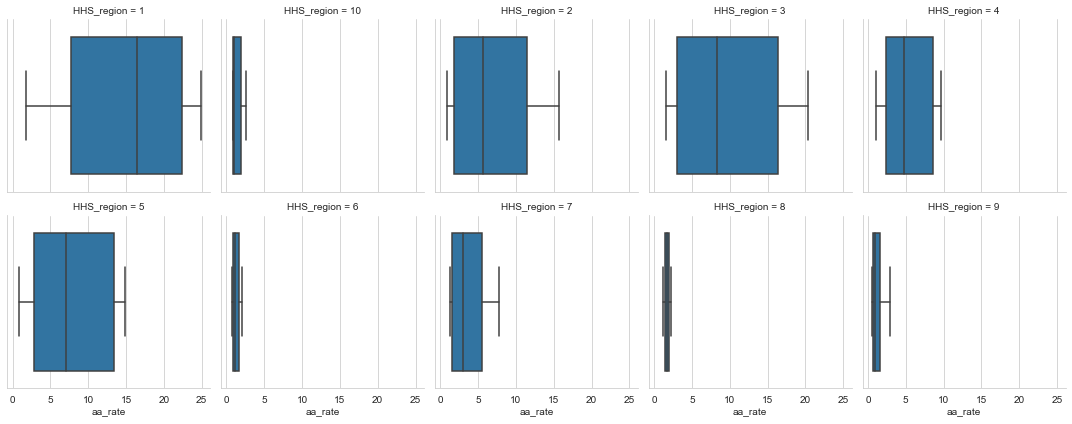

In [23]:
# FacetGrid of Box Plots for age adjusted death rate "aa_rate" 
grid = sns.FacetGrid(all_regions_wave3, col="HHS_region", col_wrap=5)
grid.map(sns.boxplot, "aa_rate")

# boxplots look good, but need to research the warning error 


Text(0.5, 0.98, 'Region 10')

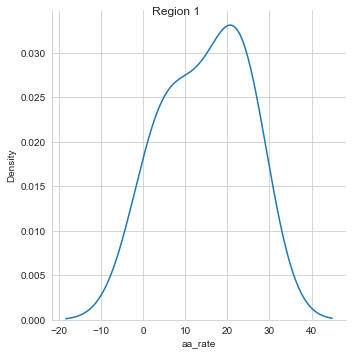

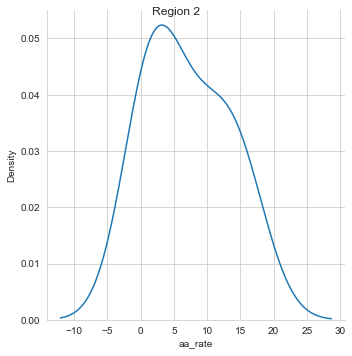

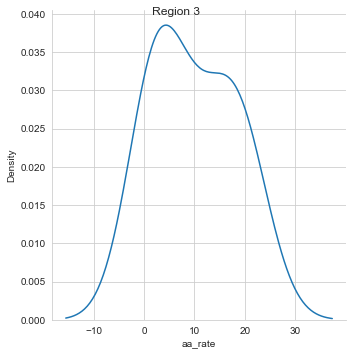

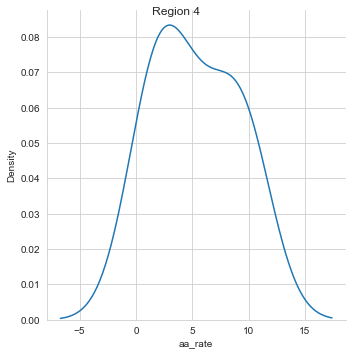

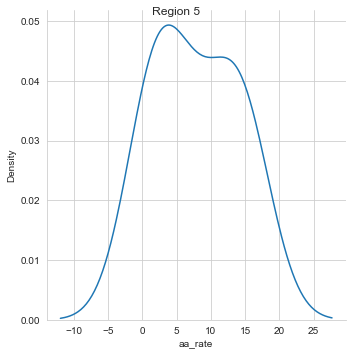

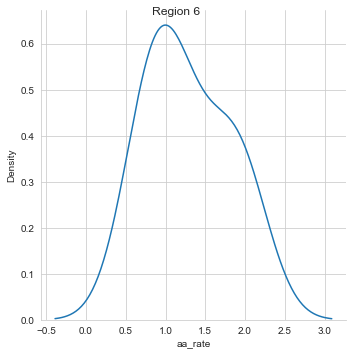

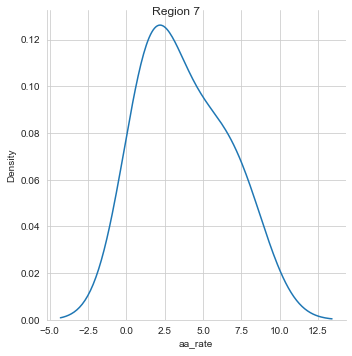

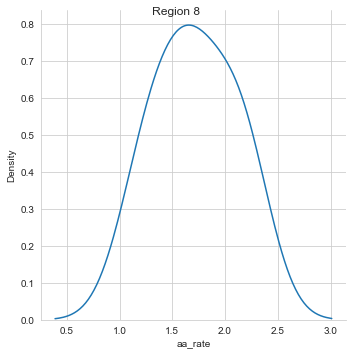

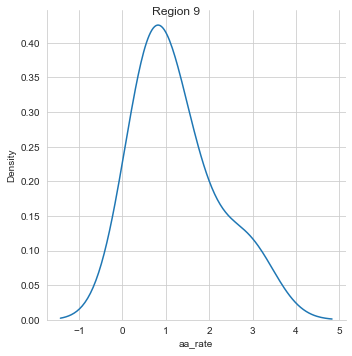

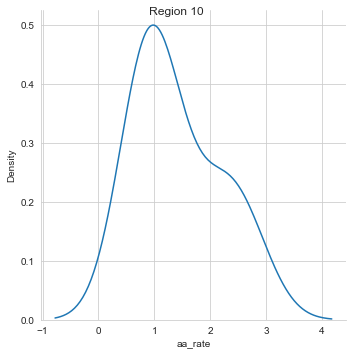

In [16]:
# distribution plots
sns.set_style("whitegrid")
kplot1 = sns.displot(region1_wave3, x="aa_rate", kind="kde")
kplot1.fig.suptitle("Region 1")

kplot2 = sns.displot(region2_wave3, x="aa_rate", kind="kde")
kplot2.fig.suptitle("Region 2")

kplot3 = sns.displot(region3_wave3, x="aa_rate", kind="kde")
kplot3.fig.suptitle("Region 3")

kplot4 = sns.displot(region4_wave3, x="aa_rate", kind="kde")
kplot4.fig.suptitle("Region 4")

kplot5 = sns.displot(region5_wave3, x="aa_rate", kind="kde")
kplot5.fig.suptitle("Region 5")

kplot6 = sns.displot(region6_wave3, x="aa_rate", kind="kde")
kplot6.fig.suptitle("Region 6")

kplot7 = sns.displot(region7_wave3, x="aa_rate", kind="kde")
kplot7.fig.suptitle("Region 7")

kplot8 = sns.displot(region8_wave3, x="aa_rate", kind="kde")
kplot8.fig.suptitle("Region 8")

kplot9 = sns.displot(region9_wave3, x="aa_rate", kind="kde")
kplot9.fig.suptitle("Region 9")

kplot10 = sns.displot(region10_wave3, x="aa_rate", kind="kde")
kplot10.fig.suptitle("Region 10")


## One Way ANOVA Using OLS Model

In [17]:
model = ols('aa_rate ~ C(HHS_region)', all_regions_wave3).fit()
model.summary()
#print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")Tu
# create ANOVA table
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(HHS_region),1092.824000,9.0,4.738594,0.000142
Residual,1281.233333,50.0,NaN,NaN


### Post Hoc Analysis Tukey's HSD

In [18]:
mc = MultiComparison(all_regions_wave3['aa_rate'],all_regions_wave3['HHS_region'])
mc_results = mc.tukeyhsd()
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1     10 -13.3667 0.0012 -23.0411 -3.6923   True
     1      2  -7.7833  0.217 -17.4577  1.8911  False
     1      3  -4.9667 0.7651 -14.6411  4.7077  False
     1      4  -9.5167 0.0574 -19.1911  0.1577  False
     1      5     -7.0 0.3514 -16.6744  2.6744  False
     1      6    -13.5 0.0011 -23.1744 -3.8256   True
     1      7 -11.0333 0.0141 -20.7077 -1.3589   True
     1      8 -13.0667 0.0017 -22.7411 -3.3923   True
     1      9 -13.5333  0.001 -23.2077 -3.8589   True
    10      2   5.5833 0.6421  -4.0911 15.2577  False
    10      3      8.4 0.1402  -1.2744 18.0744  False
    10      4     3.85    0.9  -5.8244 13.5244  False
    10      5   6.3667 0.4855  -3.3077 16.0411  False
    10      6  -0.1333    0.9  -9.8077  9.5411  False
    10      7   2.3333    0.9  -7.3411 12.0077  False
    10      8      0.3    0.

### Normality Assumption Checks

#### Shapiro Wilk Test

In [24]:
### Normality Assumption check
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

# If the p-value is greater than 0.05, then the null hypothesis is not rejected and we have a normal distribution


0.9637197256088257 0.07162781059741974


#### Q-Q Plot

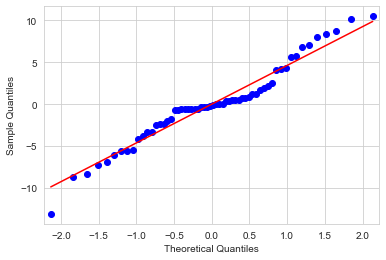

In [25]:
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

# all data points lie close to the line, so residuals do follow Normal Distribution.

### Homogeneity of Variance Assumption Check

In [26]:
# Lavene Variance Test
stats.levene(all_regions_wave3['HHS_region']=='1',all_regions_wave3['HHS_region']=='2',all_regions_wave3['HHS_region']=='3', all_regions_wave3['HHS_region']=='4', all_regions_wave3['HHS_region']=='5',all_regions_wave3['HHS_region']=='6', all_regions_wave3['HHS_region']=='7', all_regions_wave3['HHS_region']=='8',all_regions_wave3['HHS_region']=='9',all_regions_wave3['HHS_region']=='10')

# If p-value is greater than 0.05, can assume all groups have equal variances.

LeveneResult(statistic=0.0, pvalue=1.0)

# Export to CSV for Tableau Visualizations

In [22]:
#print(all_regions_wave3)
all_regions_wave3.to_csv('wave3.csv', index=False)